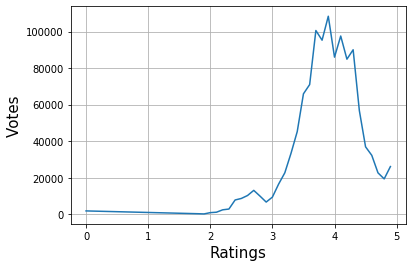

In [5]:
"""
User Rating of a restaurant plays a crucial role in selecting a restaurant or ordering the food from the restaurant.
Write a short detail analysis of how the rating is affected by restaurant due following features: Plot a suitable graph to explain your inference.
1. Number of Votes given Restaurant




Answer:  After ploting the graph we can clearly see that the restaurants who got more votes they usually got good rating i.e 4-5 
and voting range is 60k-100k . If we take a look at the low rating then we can find that there are less number of votes 
as compare to 4-5 rating range voting.
To Conclude I can say that if we go with large number of voting for a restaurant then we will get good food usually. 
"""

# Packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load Dataset
df = pd.read_csv(r'C:\Users\vatsaly\Downloads\zomato.csv',encoding='latin-1')

# Only Indian Restaurants
df = df[df['Country Code']==1] 
#Creating seperate column which has data of both ' ' and ' ' columns , this would help me to create a dictionary
df['Rating with Votes'] = df['Aggregate rating'].astype(str) + "/" + df['Votes'].astype(str) 


ratings_with_votes = {} #here i will put rating as the key , this key will
                    # will have two values value[0]=votes and value[1]=no. of restaurants who got that rating

def get_counts(rating_and_votes):
    rating = round(float(rating_and_votes.split("/")[0]),2)
    votes = int(float(rating_and_votes.split("/")[1]))
    if rating not in ratings_with_votes:
        ratings_with_votes[rating] = [votes,1]
    else:
        ratings_with_votes[rating][0]+=votes
        ratings_with_votes[rating][1]+=1
    

df['Rating with Votes'].apply(get_counts)

total_votes_rating = [[key,value[0]] for key,value in ratings_with_votes.items()]

total_votes_rating.sort()
total_votes = [i[1] for i in total_votes_rating] #storing key-value in different dictionary for plotting purposes
rating = [i[0] for i in total_votes_rating]

plt.plot(rating,total_votes)
plt.xlabel("Ratings",size = 15)
plt.ylabel("Votes", size = 15)
plt.grid()
plt.show()


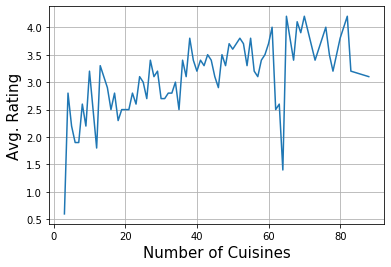

In [6]:
"""
Restaurant serving more number of cuisines.


Answer: Approach is similar to the previous questions ,I made number of cuisines as key and I have stored all the rating given to particular number of cuisines
also I have stored the number of restaurants , so basically key has two values.
And rating will lie between the min rating and max rating got by number of cuisines. To find
out the average rating I have used total_rating/restaurant_count. In the plotted graph we can notice
the higher number of cuisines offered the higher is the rating. 60 - 80 range has got the higher ratings. But still there are
some fluctuations as restaurants after offering variety of cuisines still they couldn't get good rating. So it will be better to
go with more number cuisines offered by a restaurant. 

"""

ratings = np.array(df['Aggregate rating'])
cuisines = np.array(df['Cuisines'])
rating_with_num_cuisine = {}


for i in range(np.size(ratings)):
    no_cuisines = len(cuisines[i])
    if no_cuisines not in rating_with_num_cuisine:
        rating_with_num_cuisine[no_cuisines] = [[ratings[i]],1]
    else:
        rating_with_num_cuisine[no_cuisines][0].append(ratings[i])
        rating_with_num_cuisine[no_cuisines][1]+=1

num_cuisines_with_avg_rating = []

for key, value in rating_with_num_cuisine.items():
    avg_rating = round(sum(value[0])/value[1],1)
    num_cuisines_with_avg_rating.append([key,avg_rating])
    
num_cuisines_with_avg_rating.sort(reverse=True)

num_cuisines_present = [i[0] for i in num_cuisines_with_avg_rating]

avg_ratings = [i[1] for i in num_cuisines_with_avg_rating]

plt.plot(num_cuisines_present,avg_ratings)  
plt.xlabel("Number of Cuisines",size = 15)
plt.ylabel("Avg. Rating", size = 15)
plt.grid()
plt.show()

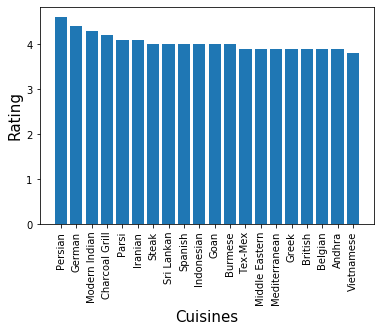

In [7]:
"""
Restaurant serving some specific cuisines.

Answer: Approach is Same as the previous question,I have made one dictionary which is storing cuisines and ratings 
and the count of restaurants,
where cuisine is the key and total_ratings and number of restaurant are the values. I found sum of all the ratings and
 divided it by the total number of restaurants, and got the average rating. Then I  sorted them in descending order 
 based on their ratings and after that I have plotted them in bar graph. From the plotted bar graph we can see that those restaurants 
 offering  German, Mordern Indian, Persian
cusines get the good ratings. So if we good to a restaurants where these cuisines are being offered then there we are
likely to get good food. 

"""

cuisines_with_rating = {} 
ratings = np.array(df['Aggregate rating'])
cuisines = np.array(df['Cuisines'])

for i in range(len(cuisines)):
    cuisine_list = cuisines[i].split(', ')
    for cuisine in cuisine_list:
        if cuisine not in cuisines_with_rating:
            cuisines_with_rating[cuisine] = [[ratings[i]],1]
        else:
            cuisines_with_rating[cuisine][0].append(ratings[i])
            cuisines_with_rating[cuisine][1]+=1

cuisines_ratings = [ [round(sum(value[0])/value[1],1),key] for key,value in cuisines_with_rating.items()]

cuisines_ratings.sort(reverse=True)
cuisines = []
ratings = []
for i in cuisines_ratings:
    cuisines.append(i[1])
    ratings.append(i[0])

plt.bar(cuisines[0:20],ratings[0:20])
plt.xticks(rotation=90)
plt.xlabel("Cuisines", size=15)
plt.ylabel("Rating", size = 15)
plt.show()


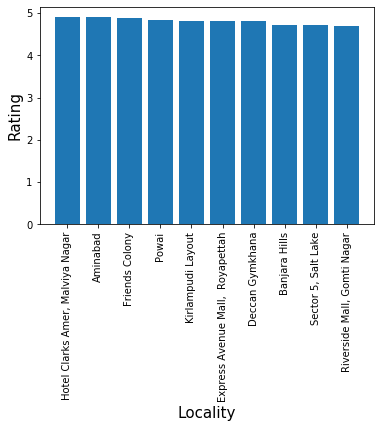

In [8]:
"""
Find the weighted restaurant rating of each locality and find out the top 10 localities 
with more weighted restaurant rating?

Answer: In this question we need to find the weighted ratings for each locality so I have used one dictionary which 
will store the locality names
and it will store all the values of all restaurants present in that locality. I have used the Formula mentioned to 
get the weighted rating. From the graph plotted
we can see these are the top 10 localites: 
1 Hotel Clarks Amer, Malviya Nagar
2 Aminabad
3 Friends Colony
4 Powai
5 Kirlampudi Layout
6 Express Avenue Mall,  Royapettah
7 Deccan Gymkhana
8 Banjara Hills
9 Sector 5, Salt Lake
10 Riverside Mall, Gomti Nagar
"""



# Store locality as key and restaurants weighted ratings
locality = {}

ratings = np.array(df['Aggregate rating'])
votes = np.array(df['Votes'])
localities = np.array(df['Locality'])
restaurants = np.array(df['Restaurant Name']) 


for i in range(np.size(localities)):
    if votes[i]!=0:
        if localities[i] not in locality:
            locality[localities[i]] = [votes[i]*ratings[i],votes[i]]
        else:
            locality[localities[i]][0] += votes[i]*ratings[i]
            locality[localities[i]][1] += votes[i]

        

locality_ratings = []
for key,value in locality.items():
    weighted_rating = round(value[0]/value[1],2) #value[0] is votes*rating component of the formula
                                                 #value[1] is number of votes
    locality_ratings.append([weighted_rating,key])

locality_ratings.sort(reverse=True) #Sorting in descending order bcz we want top 10
localities = [ i[1] for i in locality_ratings][0:10]
ratings = [ i[0] for i in locality_ratings][0:10]

plt.bar(localities,ratings)
plt.xticks(rotation=90)
plt.ylabel("Rating", size = 15)
plt.xlabel("Locality", size = 15)

plt.show()
